FIND ALL EFFECTIVE MODEL

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
from imblearn.over_sampling import SMOTE

df_r = pd.read_csv('winequality-red.csv', delimiter=';')
df_w = pd.read_csv('winequality-white.csv', delimiter=';')

df = df_r

X = df.drop('quality', axis=1).values
y = df['quality'].values

# Normalization of signs
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting a target variable to one-hot encoding
y_encoded = to_categorical(y - 3, num_classes=6)  # We use (y - 3) as a label so that the values from 0 to 5

# Let's optimize the dataset once again
os = SMOTE()
x_res, y_res = os.fit_resample(X_scaled, y_encoded)

# We divide the data into a training and a test sample
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


# A function for creating a neural network model
def create_model(layers, neurons, activation, optimizer):
    model = Sequential()

    # Adding the first hidden layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))

    # Adding the remaining hidden layers
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))

    # Output layer
    model.add(Dense(6, activation='softmax'))  # 6 classes (one-hot encoding)

    # Compiling the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# An example of several model configurations
layers_list = [4, 8, 16, 32]  # Number of layers
neurons_list = [64, 128, 256, 512]  # The number of neurons in the layer

# 1 layer (overall)
# activations = ['relu', 'elu', 'swish', 'mish', 'tanh']  # Activation functions
# optimizers = [Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta]  # Optimizers

# more layers (best choice)
activations = ['relu']
optimizers = [Nadam, RMSprop, Adam]

# Creating models using loops
models = []
for layers in layers_list:
    for neurons in neurons_list:
        for activation in activations:
            for optimizer in optimizers:
                # Creating a model
                model = create_model(layers=layers, neurons=neurons, activation=activation,
                                     optimizer=optimizer(learning_rate=0.001))
                models.append((model, layers, neurons, activation, optimizer))

# Model training and performance evaluation
history = []
for i, (model, layers, neurons, activation, optimizer) in enumerate(models):
    print(f"\nTraining model {i + 1} with the following parameters:")
    print(f" - Layers: {layers}")
    print(f" - Neurons per layer: {neurons}")
    print(f" - Activation function: {activation}")
    print(f" - Optimizer: {optimizer.__name__}")
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
    history.append(model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test),
                             callbacks=[early_stopping, TqdmCallback()], verbose=0))


RED WINE CODE

In [42]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
from imblearn.over_sampling import SMOTE

df = pd.read_csv('winequality-red.csv', delimiter=';')

X = df.drop('quality', axis=1).values
y = df['quality'].values

# Normalization of signs
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting a target variable to one-hot encoding
y_encoded = to_categorical(y - 3, num_classes=6)  # We use (y - 3) as a label so that the values from 0 to 5

# Let's optimize the dataset once again
os = SMOTE()
x_res, y_res = os.fit_resample(X_scaled, y_encoded)

# We divide the data into a training and a test sample
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


# A function for creating a neural network model
def create_model(layers, neurons, activation, optimizer):
    model = Sequential()

    # Adding the first hidden layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))

    # Adding the remaining hidden layers
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))

    # Output layer
    model.add(Dense(6, activation='softmax'))  # 6 classes (one-hot encoding)

    # Compiling the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Creating models using loops
models = []

model = create_model(layers=2,
                     neurons=128,
                     activation='relu',
                     optimizer=Nadam(learning_rate=0.001)
                     )
models.append((model, 2, 128, 'relu', Nadam))


# Model training and performance evaluation
history = []
for i, (model, layers, neurons, activation, optimizer) in enumerate(models):
    print(f"\nTraining model {i + 1} with the following parameters:")
    print(f" - Layers: {layers}")
    print(f" - Neurons per layer: {neurons}")
    print(f" - Activation function: {activation}")
    print(f" - Optimizer: {optimizer.__name__}")
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
    history.append(model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test),
                             callbacks=[early_stopping, TqdmCallback()], verbose=0))



Training model 1 with the following parameters:
 - Layers: 2
 - Neurons per layer: 128
 - Activation function: relu
 - Optimizer: Nadam


C:\Users\Hikari\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

RED WINE PLOT


Evaluating Model 1:
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0     0.9778    1.0000    0.9888       132
           1     0.8889    0.9771    0.9309       131
           2     0.7394    0.7000    0.7192       150
           3     0.6894    0.5871    0.6341       155
           4     0.8651    0.9397    0.9008       116
           5     0.9640    1.0000    0.9817       134

    accuracy                         0.8545       818
   macro avg     0.8541    0.8673    0.8593       818
weighted avg     0.8470    0.8545    0.8492       818



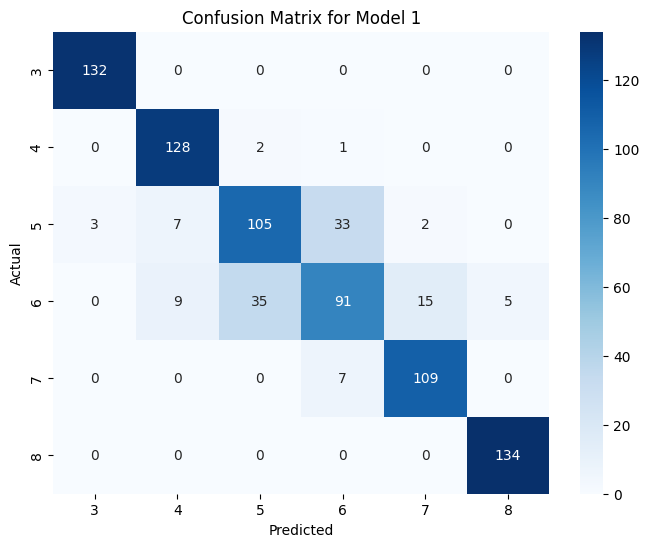

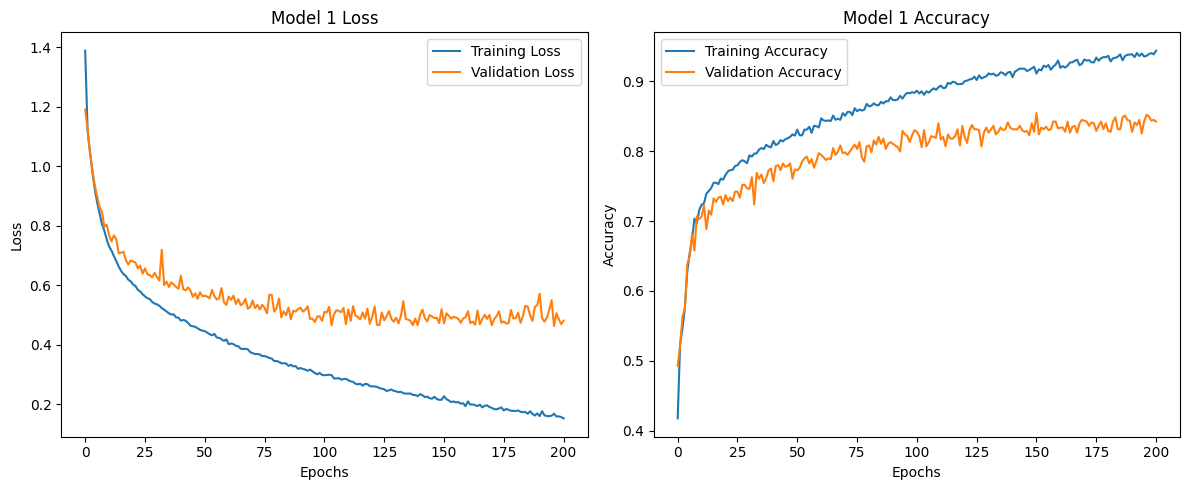

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_metrics(history, model_index):
    """
    Plot training and validation loss and accuracy.
    """
    plt.figure(figsize=(12, 5))
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_index} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {model_index} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate each model
for i, (model, layers, neurons, activation, optimizer) in enumerate(models):
    print(f"\nEvaluating Model {i + 1}:")
    
    # Predictions and metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Classification report
    print(classification_report(y_test_classes, y_pred_classes, digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 9), yticklabels=range(3, 9))
    plt.title(f'Confusion Matrix for Model {i + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot metrics
    plot_metrics(history[i], i + 1)


WHITE WINE CODE

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Nadam, Adagrad, Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tqdm.keras import TqdmCallback
from imblearn.over_sampling import SMOTE

df = pd.read_csv('winequality-white.csv', delimiter=';')

X = df.drop('quality', axis=1).values
y = df['quality'].values

# Normalization of signs
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Converting a target variable to one-hot encoding
y_encoded = to_categorical(y - 3, num_classes=7)  # We use (y - 3) as a label so that the values from 0 to 6

# Let's optimize the dataset once again
print(X_scaled.shape)
print(y_encoded.shape)
os = SMOTE(k_neighbors=4) 
x_res, y_res = os.fit_resample(X_scaled, y_encoded)


# We divide the data into a training and a test sample
X_train, X_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


# A function for creating a neural network model
def create_model(layers, neurons, activation, optimizer):
    model = Sequential()

    # Adding the first hidden layer
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))

    # Adding the remaining hidden layers
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))

    # Output layer
    model.add(Dense(7, activation='softmax'))  # 6 classes (one-hot encoding)

    # Compiling the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


# Creating models using loops
models = []

model = create_model(layers=2,
                     neurons=128,
                     activation='relu',
                     optimizer=Nadam(learning_rate=0.001)
                     )
models.append((model, 2, 128, 'relu', Nadam))


# Model training and performance evaluation
history = []
for i, (model, layers, neurons, activation, optimizer) in enumerate(models):
    print(f"\nTraining model {i + 1} with the following parameters:")
    print(f" - Layers: {layers}")
    print(f" - Neurons per layer: {neurons}")
    print(f" - Activation function: {activation}")
    print(f" - Optimizer: {optimizer.__name__}")
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True)
    history.append(model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test),
                             callbacks=[early_stopping, TqdmCallback()], verbose=0))



(4898, 11)
(4898, 7)

Training model 1 with the following parameters:
 - Layers: 2
 - Neurons per layer: 128
 - Activation function: relu
 - Optimizer: Nadam


C:\Users\Hikari\anaconda3\envs\ML\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

WHITE WINE PLOT

Unique values in 'quality': [3 4 5 6 7 8 9]

Evaluating Model 1:
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0     0.9749    1.0000    0.9873       428
           1     0.9304    0.9862    0.9575       434
           2     0.7793    0.7377    0.7579       469
           3     0.6894    0.6121    0.6485       446
           4     0.8103    0.8704    0.8393       432
           5     0.9630    0.9757    0.9693       453
           6     1.0000    1.0000    1.0000       416

    accuracy                         0.8801      3078
   macro avg     0.8782    0.8832    0.8800      3078
weighted avg     0.8760    0.8801    0.8773      3078



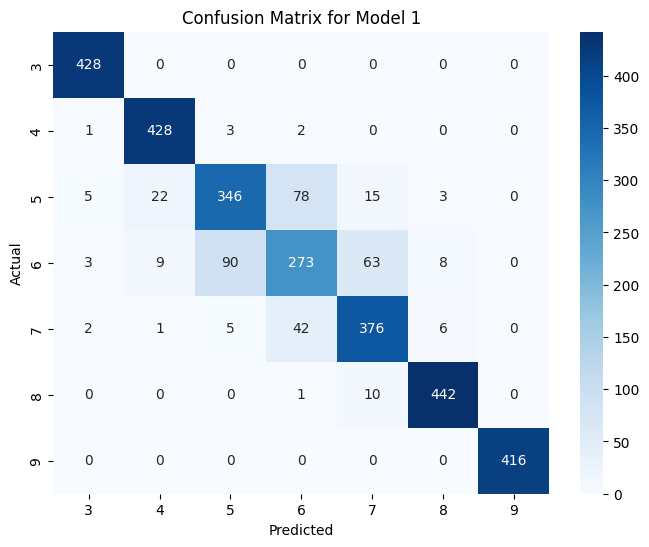

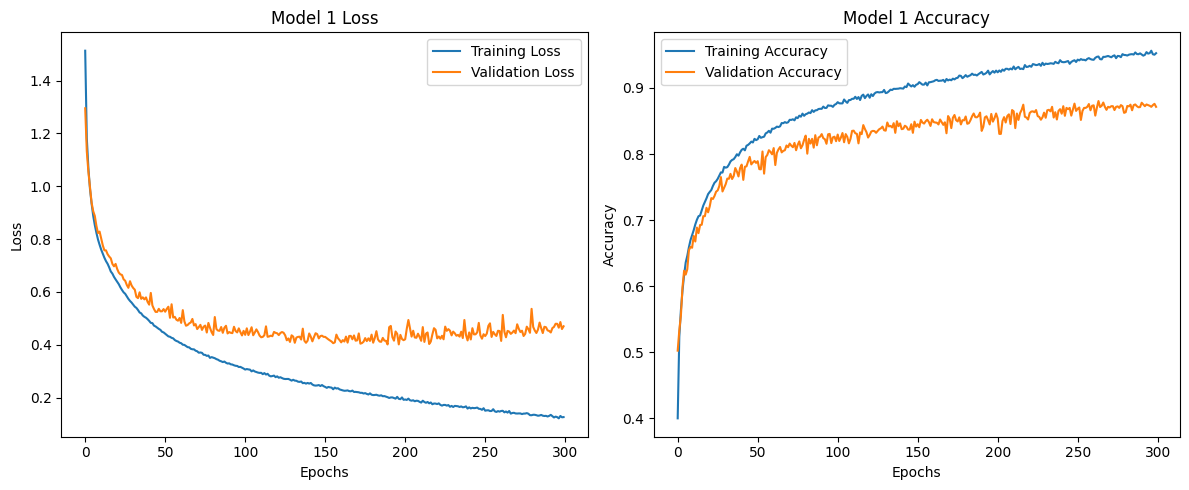

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

unique_values = np.unique(y)
print("Unique values in 'quality':", unique_values)

def plot_metrics(history, model_index):
    """
    Plot training and validation loss and accuracy.
    """
    plt.figure(figsize=(12, 5))
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model {model_index} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model {model_index} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Evaluate each model
for i, (model, layers, neurons, activation, optimizer) in enumerate(models):
    print(f"\nEvaluating Model {i + 1}:")
    
    # Predictions and metrics
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Classification report
    print(classification_report(y_test_classes, y_pred_classes, digits=4))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 10), yticklabels=range(3, 10))
    plt.title(f'Confusion Matrix for Model {i + 1}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Plot metrics
    plot_metrics(history[i], i + 1)
